In [12]:
# import joblib
# model_persistance = joblib.load('youtubespam.joblib')

In [13]:
import joblib

# Load the saved model and vectorizer
MODEL_PATH = "model/youtubespam_model.joblib"
VECTORIZER_PATH = "model/youtubespam_vectorizer.joblib"

loaded_model = joblib.load(MODEL_PATH)
loaded_vectorizer = joblib.load(VECTORIZER_PATH)

def pred_class(comment):
    # Transform the input comment using the loaded vectorizer
    comment_vectorized = loaded_vectorizer.transform([comment])
    
    # Predict using the loaded model
    predicted_class = loaded_model.predict(comment_vectorized)[0]
    
    # Return the result
    if predicted_class == 0:
        return f'"{comment}" is NOT A SPAM MESSAGE'
    else:
        return f'"{comment}" IS A SPAM MESSAGE'

# Example usage
comment = "Sakyi is a fool"
pred_class(comment)


'"Sakyi is a fool" is NOT A SPAM MESSAGE'

# test the model on a whole new dataset and see how it performs

In [14]:
import pandas as pd
import joblib

# Load the saved model and vectorizer
MODEL_PATH = "model/youtubespam_model.joblib"
VECTORIZER_PATH = "model/youtubespam_vectorizer.joblib"

loaded_model = joblib.load(MODEL_PATH)
loaded_vectorizer = joblib.load(VECTORIZER_PATH)

def pred_class(comment):
    # Transform the input comment using the loaded vectorizer
    comment_vectorized = loaded_vectorizer.transform([comment])
    
    # Predict using the loaded model
    predicted_class = loaded_model.predict(comment_vectorized)[0]
    
    # Return the result
    if predicted_class == 0:
        return 0
    else:
        return 1

# Load the CSV file
CSV_FILE_PATH = "Final-Dataset.csv"  # Update with your actual file path
OUTPUT_FILE_PATH = "comments_with_predictions1.csv"

df = pd.read_csv('Final-Dataset.csv')

# Assume the comments are in a column named 'comment'
if 'FORMATTED_CONTENT' in df.columns:
    # Apply the prediction function to each comment
    df['Prediction'] = df['FORMATTED_CONTENT'].apply(pred_class)
    
    # Save the updated DataFrame to a new CSV file
    df.to_csv(OUTPUT_FILE_PATH, index=False)
    print(f"Predictions saved to {OUTPUT_FILE_PATH}")
else:
    print("The CSV file does not contain a 'comment' column.")

Predictions saved to comments_with_predictions1.csv


# graphical rep of how well the model performs against the new dataset

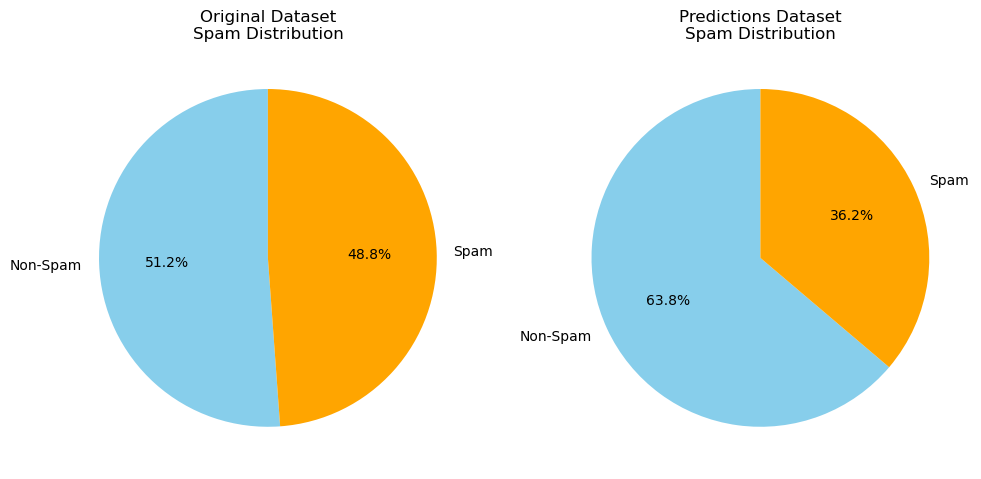

Original Dataset Counts:
CLASS
0    62341
1    59523
Name: count, dtype: int64

Predictions Dataset Counts:
Prediction
0    77745
1    44119
Name: count, dtype: int64


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
original_dataset = pd.read_csv('Final-Dataset.csv')
predictions_dataset = pd.read_csv('comments_with_predictions1.csv')

# Pie chart for original dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
original_counts = original_dataset['CLASS'].value_counts()
plt.pie(original_counts, labels=['Non-Spam', 'Spam'], autopct='%1.1f%%', 
        colors=['skyblue', 'orange'], startangle=90)
plt.title('Original Dataset\nSpam Distribution')

# Pie chart for predictions dataset
plt.subplot(1, 2, 2)
predictions_counts = predictions_dataset['Prediction'].value_counts()
plt.pie(predictions_counts, labels=['Non-Spam', 'Spam'], autopct='%1.1f%%', 
        colors=['skyblue', 'orange'], startangle=90)
plt.title('Predictions Dataset\nSpam Distribution')

plt.tight_layout()
plt.show()

# Print out the exact counts for clarity
print("Original Dataset Counts:")
print(original_counts)
print("\nPredictions Dataset Counts:")
print(predictions_counts)

# confusion matrix

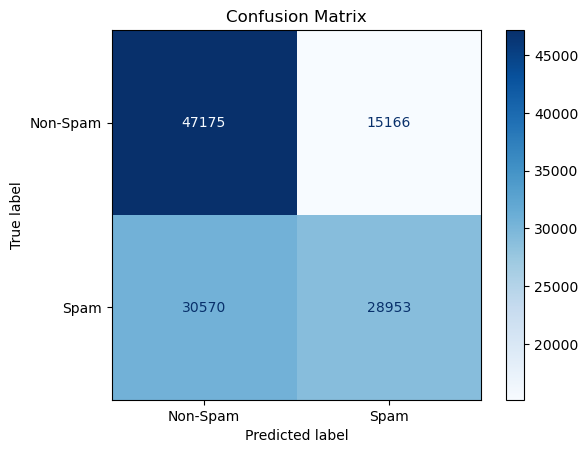

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (previous code for loading datasets and creating pie charts) ...

# Create confusion matrix
cm = confusion_matrix(original_dataset['CLASS'], predictions_dataset['Prediction'])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Spam', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

